In [1]:
### 데이터 처리(조작) 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

In [2]:
file_path = "./files_org/SAMPLE_DB_30TABLE_2013.txt"
file_path_kr = "./files_org/표본자료 변수 테이블(2012-2013).xlsx"
df = pd.read_csv(file_path)
df_kr = pd.read_excel(file_path_kr,sheet_name="30table_진료내역",usecols="A,D")
df

,key,CZ_CD,ITEM_CD,DIV_TY_CD,DIV_CD,SP1_SP2_TP_CD,UNPRC,FQ1_MDCT_QTY,DY1_MDCT_QTY,DY1_INJC_QTY_EXEC_FQ,TOT_INJC_DDCNT_EXEC_FQ,TOT_USE_QTY_OR_EXEC_FQ,AMT,ADDC_ADT_AMT,LN_NO,GNL_NM_CD
0,1,01,2,1,AA254,1,9430,1.0,1.0,1.0,1,1.0,9430,9430,1,$
1,2,09,1,1,C3710,2,900,1.0,1.0,1.0,1,1.0,900,900,1,$
2,3,01,2,1,AA222,1,3310,1.0,1.0,1.0,1,1.0,3310,3310,1,$
3,4,10,1,8,K2062001,1,310,1.0,1.0,1.0,1,1.0,310,310,4,$
4,4,10,1,1,G9101,2,2960,1.0,1.0,1.0,1,1.0,2960,3404,3,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,5628,09,1,1,B2590,2,2030,1.0,1.0,1.0,1,1.0,2030,2639,16,$
24901,5628,09,1,1,C3797,2,1620,1.0,1.0,1.0,1,1.0,1620,2106,21,$
24902,5629,01,1,1,AA154600,1,13820,1.0,1.0,1.0,1,1.0,13820,13820,1,$
24903,5630,01,2,1,AA254,1,9430,1.0,1.0,1.0,1,1.0,9430,9430,1,$


In [3]:
df_kr

,변수명,표준한글컬럼명
0,key,명세서 연결코드
1,CZ_CD,항코드
2,ITEM_CD,목코드
3,DIV_TY_CD,분류유형코드
4,DIV_CD,분류코드
5,SP1_SP2_TP_CD,1_2구분코드
6,UNPRC,단가
7,FQ1_MDCT_QTY,1회투약량
8,DY1_MDCT_QTY,1일투약량
9,DY1_INJC_QTY_EXEC_FQ,1일투여량실시횟수


In [4]:
df_kr_dict = {}

for idx in range(0,len(df_kr)):
    df_kr_dict[df_kr["변수명"][idx]] = df_kr["표준한글컬럼명"][idx]

In [5]:
df_kor = df.rename(columns=df_kr_dict)
df_kor

,명세서 연결코드,항코드,목코드,분류유형코드,분류코드,1_2구분코드,단가,1회투약량,1일투약량,1일투여량실시횟수,총투여일수또는실시횟수,총사용량또는실시횟수,금액,가산적용금액,줄번호,일반명코드
0,1,01,2,1,AA254,1,9430,1.0,1.0,1.0,1,1.0,9430,9430,1,$
1,2,09,1,1,C3710,2,900,1.0,1.0,1.0,1,1.0,900,900,1,$
2,3,01,2,1,AA222,1,3310,1.0,1.0,1.0,1,1.0,3310,3310,1,$
3,4,10,1,8,K2062001,1,310,1.0,1.0,1.0,1,1.0,310,310,4,$
4,4,10,1,1,G9101,2,2960,1.0,1.0,1.0,1,1.0,2960,3404,3,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,5628,09,1,1,B2590,2,2030,1.0,1.0,1.0,1,1.0,2030,2639,16,$
24901,5628,09,1,1,C3797,2,1620,1.0,1.0,1.0,1,1.0,1620,2106,21,$
24902,5629,01,1,1,AA154600,1,13820,1.0,1.0,1.0,1,1.0,13820,13820,1,$
24903,5630,01,2,1,AA254,1,9430,1.0,1.0,1.0,1,1.0,9430,9430,1,$


In [6]:
df_kor.describe()

,명세서 연결코드,목코드,분류유형코드,1_2구분코드,단가,1회투약량,1일투약량,1일투여량실시횟수,총투여일수또는실시횟수,총사용량또는실시횟수,금액,가산적용금액,줄번호
count,24905.000000,24905.000000,24905.000000,24905.000000,2.490500e+04,24905.000000,24905.000000,24905.00000,24905.000000,24905.000000,2.490500e+04,2.490500e+04,24905.000000
mean,2849.765670,2.129693,1.445613,1.441156,7.399741e+03,1.151245,1.557787,1.74385,1.917727,3.618996,1.066358e+04,1.154760e+04,14.920096
std,1643.060032,8.002492,1.110079,0.496535,3.034351e+04,5.444529,11.867595,13.13220,3.951381,28.351040,5.546960e+04,5.751674e+04,34.342813
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.00400,0.000000,0.005000,0.000000e+00,0.000000e+00,1.000000
25%,1377.000000,1.000000,1.000000,1.000000,7.700000e+02,1.000000,1.000000,1.00000,1.000000,1.000000,9.800000e+02,1.127000e+03,2.000000
50%,2853.000000,1.000000,1.000000,1.000000,1.710000e+03,1.000000,1.000000,1.00000,1.000000,1.000000,2.760000e+03,3.012000e+03,4.000000
75%,4334.000000,2.000000,1.000000,2.000000,9.430000e+03,1.000000,1.000000,1.00000,1.000000,1.000000,9.430000e+03,9.568000e+03,10.000000
max,5631.000000,99.000000,8.000000,2.000000,1.978840e+06,600.000000,960.000000,960.00000,60.000000,2592.000000,3.957680e+06,3.957680e+06,324.000000


<Axes: >

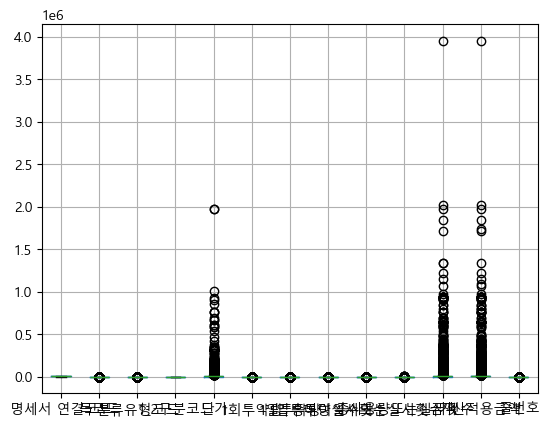

In [7]:
df_kor.boxplot()

In [8]:
plt.boxplot(df_kor["가산적용금액"])

{'whiskers': [<matplotlib.lines.Line2D at 0x154bf7420a0>,
 'caps': [<matplotlib.lines.Line2D at 0x154bf7425e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x154bf751dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x154bf742b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x154bf742dc0>],
 'means': []}

In [9]:
plt.boxplot(df_kor["금액"])

{'whiskers': [<matplotlib.lines.Line2D at 0x154bf769430>,
 'caps': [<matplotlib.lines.Line2D at 0x154bf769970>,
 'boxes': [<matplotlib.lines.Line2D at 0x154bf769190>],
 'medians': [<matplotlib.lines.Line2D at 0x154bf769eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x154bf9ab190>],
 'means': []}

In [10]:
plt.boxplot(df_kor["단가"])

{'whiskers': [<matplotlib.lines.Line2D at 0x154bf9aba00>,
 'caps': [<matplotlib.lines.Line2D at 0x154bf3a7ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x154bf9ab760>],
 'medians': [<matplotlib.lines.Line2D at 0x154c01564f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x154c0141790>],
 'means': []}

In [11]:
c = df_kor["가산적용금액"] == 3.957680e+06

In [12]:
df_kor[c]

,명세서 연결코드,항코드,목코드,분류유형코드,분류코드,1_2구분코드,단가,1회투약량,1일투약량,1일투여량실시횟수,총투여일수또는실시횟수,총사용량또는실시횟수,금액,가산적용금액,줄번호,일반명코드
6857,1493,08,1,8,J5083029,1,1978840,1.0,2.0,2.0,1,2.0,3957680,3957680,75,$


# 다른 데이터 불러오기

In [13]:
file_path2 = "./files_org/SAMPLE_DB_20TABLE_2013.txt"
df2 = pd.read_csv(file_path2)
df_kr2 = pd.read_excel(file_path_kr,sheet_name="20table_명세서일반내역",usecols="A,D")
df2

,key,no,DMD_FRM_CD,DMD_TP_CD,FOM_CD,AGG,SelectionProb,SamplingWeight,PAT_AGE,SEX_TP_CD,...,VST_DDCNT,RVD_RPE_TAMT_AMT,RVD_SLF_BRDN_AMT,RVD_INSUP_BRDN_AMT,SOPR_YN,PRCL_SYM_TP_CD,MAIDCL_CD,RADT_DIAG_YN,RADT_TRET_YN,yno
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [14]:
df_kr2

,변수명,표준한글컬럼명
0,key,명세서 연결코드
1,DMD_TP_CD,청구구분코드
2,DMD_FRM_CD,청구형태코드
3,FOM_CD,서식코드
4,no,수진자고유번호
5,AGG,연령군
6,SelectionProb,추출확률
7,SamplingWeight,샘플가중치
8,PAT_AGE,수진자연령
9,SEX_TP_CD,성별구분코드


In [15]:
df_kr_dict2 = {}

for idx in range(0,len(df_kr2)):
    df_kr_dict2[df_kr2["변수명"][idx]] = df_kr2["표준한글컬럼명"][idx]

df_kr_dict2

{'key': '명세서 연결코드',
 'DMD_TP_CD': '청구구분코드',
 'DMD_FRM_CD': '청구형태코드',
 'FOM_CD': '서식코드',
 'no': '수진자고유번호',
 'AGG': '연령군',
 'SelectionProb': '추출확률',
 'SamplingWeight': '샘플가중치',
 'PAT_AGE': '수진자연령',
 'SEX_TP_CD': '성별구분코드',
 'INSUP_TP_CD': '보험자코드',
 'MSICK_CD': '주상병코드',
 'SSICK_CD': '부상병코드',
 'RECU_FR_DD': '요양개시일자',
 'RECU_TO_DD': '요양만료일자',
 'DGRSLT_TP_CD': '진료결과구분코드',
 'DGSBJT_CD': '진료과목코드',
 'DMD_DRG_NO': '청구DRG번호',
 'FST_IPAT_DD': '최초입원일자',
 'IPAT_ARIV_PTH_TP_CD': '입원도착경로구분코드',
 'OINJ_TP_CD': '공상구분코드',
 'RECU_DDCNT': '요양일수',
 'VST_DDCNT': '내원일수',
 'RVD_RPE_TAMT_AMT': '심결요양급여비용총액',
 'RVD_SLF_BRDN_AMT': '심결본인부담금',
 'RVD_INSUP_BRDN_AMT': '심결보험자부담금',
 'SOPR_YN': '수술여부',
 'PRCL_SYM_TP_CD': '특정기호구분코드',
 'MAIDCL_CD': '의료급여종별코드',
 'RADT_DIAG_YN': '방사선진단여부',
 'RADT_TRET_YN': '방사선치료여부',
 'yno': '요양기관 고유번호'}

In [16]:
df_kor2 = df2.rename(columns=df_kr_dict2)
df_kor2

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [17]:
# 남성과 여성 중 누가 더 자주 병원을 찾는지, 어떤 종류의 진료를 받는지를 분석하는 것도 간단하고 재밌을 거야

In [18]:
df_kor2["성별구분코드"].value_counts()

# -> 남성

성별구분코드
1    2864
2    2767
Name: count, dtype: int64

In [19]:
df_kor2["부상병코드"]

0       R100
1       E119
2          $
3          $
4       M130
        ... 
5626       $
5627    R945
5628    J209
5629    J209
5630       $
Name: 부상병코드, Length: 5631, dtype: object

In [20]:
file_path_i = "./상병기호.csv"
df_i = pd.read_csv(file_path_i,encoding="ANSI")


In [21]:
df_i_l = df_i.loc[:,"상병기호":"상병기호명"]
df_i_l

,상병기호,상병기호명
0,W176,기타한면에서다른면으로넘어짐 산업및건설지역
1,W177,기타한면에서다른면으로넘어짐 농장
2,W178,기타한면에서다른면으로넘어짐 기타명시된장소
3,W179,기타한면에서다른면으로넘어짐 상세불명장소
4,W19,상세불명의낙상
...,...,...
23758,V565,교통사고~무동력차량과의충돌로다친픽업트럭또는밴의운전자
23759,M6029,달리분류되지않은연조직의이물육아종 상세불명부분
23760,B964,다른장에서분류된~인으로서의프로테우스(미라빌리스)(모르가니)
23761,B965,다른장에서분류된질환의원인으로서의슈도모나스(아에루기노사)


In [22]:
df_kor2

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [23]:
df_kor2_merge = pd.merge(
                        left=df_kor2,
                        right=df_i_l,
                        how="inner",
                        left_on="주상병코드",
                        right_on="상병기호")

In [24]:
df_kor2_merge

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,상병기호,상병기호명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,2800,6630,0,$,$,$,$,30796,A090,감염성 기원의 기타 및 상세불명의 위장염 및 결장염
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,500,3880,0,$,$,$,$,9795,I109,기타및상세불명의원발성고혈압
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1300,2010,0,$,$,$,$,34835,F849,상세불명의전반발달장애
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,7900,18760,0,$,$,$,$,35538,K0538,기타명시된만성치주염
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,2800,6630,0,$,$,$,$,4665,J00,급성비인두염[감기]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,3900,9410,0,$,$,$,$,21762,K121,구내염의기타형태
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,3500,67810,0,V193,$,$,$,45362,C921,만성골수성백혈병 BCR/ABL-양성
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,2900,10920,0,$,$,$,$,12083,J320,만성상악동염
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,2800,6630,0,$,$,$,$,21067,M7954,연조직내의잔류이물 손


In [25]:
df_kor2_merge = df_kor2_merge.rename(columns={"상병기호명":"주상병코드명"})
df_kor2_merge

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,상병기호,주상병코드명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,2800,6630,0,$,$,$,$,30796,A090,감염성 기원의 기타 및 상세불명의 위장염 및 결장염
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,500,3880,0,$,$,$,$,9795,I109,기타및상세불명의원발성고혈압
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1300,2010,0,$,$,$,$,34835,F849,상세불명의전반발달장애
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,7900,18760,0,$,$,$,$,35538,K0538,기타명시된만성치주염
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,2800,6630,0,$,$,$,$,4665,J00,급성비인두염[감기]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,3900,9410,0,$,$,$,$,21762,K121,구내염의기타형태
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,3500,67810,0,V193,$,$,$,45362,C921,만성골수성백혈병 BCR/ABL-양성
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,2900,10920,0,$,$,$,$,12083,J320,만성상악동염
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,2800,6630,0,$,$,$,$,21067,M7954,연조직내의잔류이물 손


In [26]:
df_kor2_merge = df_kor2_merge.drop("상병기호",axis=1)
df_kor2_merge

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,주상병코드명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,9430,2800,6630,0,$,$,$,$,30796,감염성 기원의 기타 및 상세불명의 위장염 및 결장염
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,4380,500,3880,0,$,$,$,$,9795,기타및상세불명의원발성고혈압
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,3310,1300,2010,0,$,$,$,$,34835,상세불명의전반발달장애
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,26660,7900,18760,0,$,$,$,$,35538,기타명시된만성치주염
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,9430,2800,6630,0,$,$,$,$,4665,급성비인두염[감기]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,13310,3900,9410,0,$,$,$,$,21762,구내염의기타형태
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,71310,3500,67810,0,V193,$,$,$,45362,만성골수성백혈병 BCR/ABL-양성
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,13820,2900,10920,0,$,$,$,$,12083,만성상악동염
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,9430,2800,6630,0,$,$,$,$,21067,연조직내의잔류이물 손


In [27]:
df_kor2_merge = pd.merge(
                        left=df_kor2_merge,
                        right=df_i_l,
                        how="left",
                        left_on="부상병코드",
                        right_on="상병기호")

In [28]:
df_kor2_merge

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,주상병코드명,상병기호,상병기호명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,6630,0,$,$,$,$,30796,감염성 기원의 기타 및 상세불명의 위장염 및 결장염,R100,급성복증
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,3880,0,$,$,$,$,9795,기타및상세불명의원발성고혈압,E119,합병증을동반하지않은2형당뇨병
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,2010,0,$,$,$,$,34835,상세불명의전반발달장애,NaN,NaN
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,18760,0,$,$,$,$,35538,기타명시된만성치주염,NaN,NaN
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,6630,0,$,$,$,$,4665,급성비인두염[감기],M130,상세불명의다발관절염
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,9410,0,$,$,$,$,21762,구내염의기타형태,NaN,NaN
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,67810,0,V193,$,$,$,45362,만성골수성백혈병 BCR/ABL-양성,R945,간기능검사의이상결과
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,10920,0,$,$,$,$,12083,만성상악동염,J209,상세불명의급성기관지염
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,6630,0,$,$,$,$,21067,연조직내의잔류이물 손,J209,상세불명의급성기관지염


In [29]:
df_kor2_merge

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,주상병코드명,상병기호,상병기호명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,6630,0,$,$,$,$,30796,감염성 기원의 기타 및 상세불명의 위장염 및 결장염,R100,급성복증
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,3880,0,$,$,$,$,9795,기타및상세불명의원발성고혈압,E119,합병증을동반하지않은2형당뇨병
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,2010,0,$,$,$,$,34835,상세불명의전반발달장애,NaN,NaN
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,18760,0,$,$,$,$,35538,기타명시된만성치주염,NaN,NaN
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,6630,0,$,$,$,$,4665,급성비인두염[감기],M130,상세불명의다발관절염
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,9410,0,$,$,$,$,21762,구내염의기타형태,NaN,NaN
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,67810,0,V193,$,$,$,45362,만성골수성백혈병 BCR/ABL-양성,R945,간기능검사의이상결과
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,10920,0,$,$,$,$,12083,만성상악동염,J209,상세불명의급성기관지염
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,6630,0,$,$,$,$,21067,연조직내의잔류이물 손,J209,상세불명의급성기관지염


In [30]:
df_kor2_merge = df_kor2_merge.drop("상병기호",axis=1)
df_kor2_merge

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,주상병코드명,상병기호명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,2800,6630,0,$,$,$,$,30796,감염성 기원의 기타 및 상세불명의 위장염 및 결장염,급성복증
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,500,3880,0,$,$,$,$,9795,기타및상세불명의원발성고혈압,합병증을동반하지않은2형당뇨병
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1300,2010,0,$,$,$,$,34835,상세불명의전반발달장애,NaN
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,7900,18760,0,$,$,$,$,35538,기타명시된만성치주염,NaN
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,2800,6630,0,$,$,$,$,4665,급성비인두염[감기],상세불명의다발관절염
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,3900,9410,0,$,$,$,$,21762,구내염의기타형태,NaN
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,3500,67810,0,V193,$,$,$,45362,만성골수성백혈병 BCR/ABL-양성,간기능검사의이상결과
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,2900,10920,0,$,$,$,$,12083,만성상악동염,상세불명의급성기관지염
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,2800,6630,0,$,$,$,$,21067,연조직내의잔류이물 손,상세불명의급성기관지염


In [31]:
df_kor2_merge_ill = df_kor2_merge.rename(columns={"상병기호명":"부상병코드명"})
df_kor2_merge_ill

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,주상병코드명,부상병코드명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,2800,6630,0,$,$,$,$,30796,감염성 기원의 기타 및 상세불명의 위장염 및 결장염,급성복증
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,500,3880,0,$,$,$,$,9795,기타및상세불명의원발성고혈압,합병증을동반하지않은2형당뇨병
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1300,2010,0,$,$,$,$,34835,상세불명의전반발달장애,NaN
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,7900,18760,0,$,$,$,$,35538,기타명시된만성치주염,NaN
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,2800,6630,0,$,$,$,$,4665,급성비인두염[감기],상세불명의다발관절염
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,3900,9410,0,$,$,$,$,21762,구내염의기타형태,NaN
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,3500,67810,0,V193,$,$,$,45362,만성골수성백혈병 BCR/ABL-양성,간기능검사의이상결과
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,2900,10920,0,$,$,$,$,12083,만성상악동염,상세불명의급성기관지염
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,2800,6630,0,$,$,$,$,21067,연조직내의잔류이물 손,상세불명의급성기관지염


In [32]:
df_kor2_merge_ill["성별구분코드"].value_counts()

성별구분코드
1    2864
2    2767
Name: count, dtype: int64

In [33]:
### 성별에 따른 주상병 비율을 찾아볼까?

## 사용할 데이터 : 성별구분코드 , 주상병코드명

# - 필요한 컬럼들을 별도의 데이터프레임으로 저장해서 사용



In [34]:
df_temp = df_kor2_merge_ill[["성별구분코드","주상병코드명"]].copy()
df_temp

,성별구분코드,주상병코드명
0,1,감염성 기원의 기타 및 상세불명의 위장염 및 결장염
1,2,기타및상세불명의원발성고혈압
2,1,상세불명의전반발달장애
3,1,기타명시된만성치주염
4,1,급성비인두염[감기]
...,...,...
5626,2,구내염의기타형태
5627,1,만성골수성백혈병 BCR/ABL-양성
5628,1,만성상악동염
5629,2,연조직내의잔류이물 손


In [35]:
c = df_temp["성별구분코드"] == 1
male_series = df_temp[c]["주상병코드명"].value_counts().nlargest(5)

In [36]:
c2 = df_temp["성별구분코드"] == 2
female_series = df_temp[c2]["주상병코드명"].value_counts().nlargest(5)

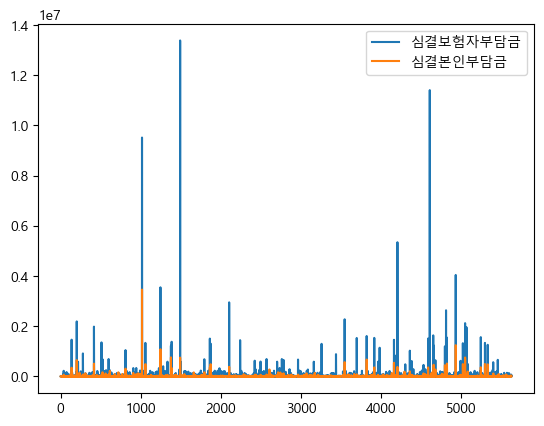

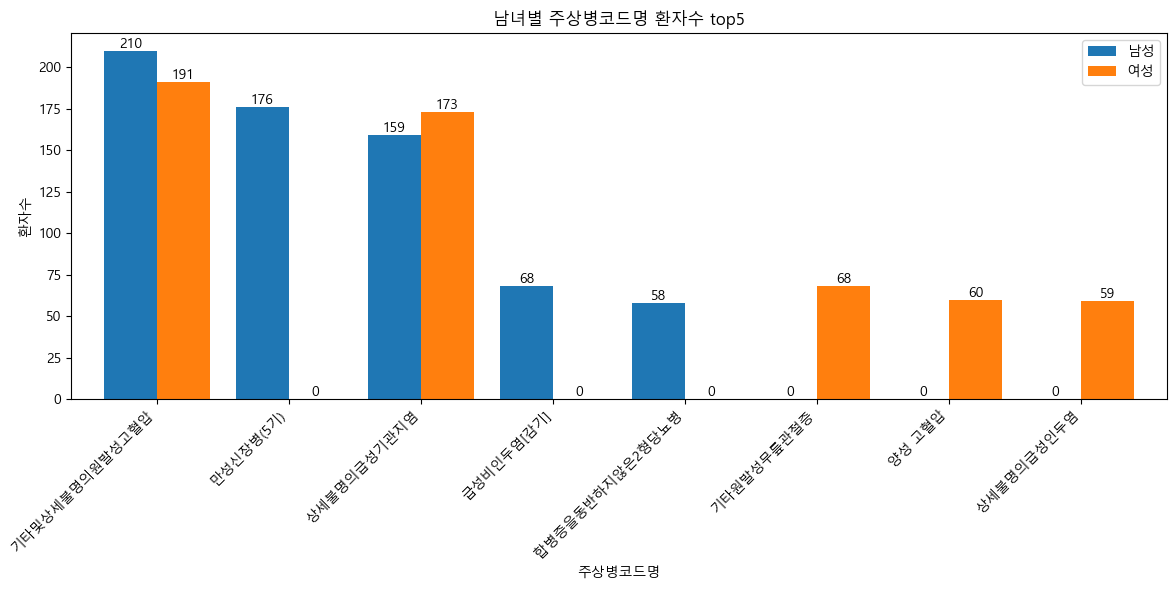

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 이미 존재하는 시리즈라고 가정
# male_series = ...
# female_series = ...

# 두 시리즈를 데이터프레임으로 결합
df = pd.concat([male_series, female_series], axis=1)
df.columns = ['남성', '여성']

# 막대 그래프 그리기
ax = df.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('남녀별 주상병코드명 환자수 top5')
plt.xlabel('주상병코드명')
plt.ylabel('환자수')
plt.legend(['남성', '여성'])
plt.xticks(rotation=45, ha='right')

# 막대 위에 값 표시
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()


In [ ]:
# 해석

"""

1. 성별에 따른 주상병코드명에 따른 환자수를 비교한 막대 그래프이다.

2. 남자와 여자가 가장 많이 걸리는 주상병은 공통적으로 기타 및 상세불명의 원발성 고혈압이다. 
-> 특정 병원, 특정 지역, 특정 나라에서 잘 걸리는 병인지 확인이 필요하다

3. 남자는 만성신장병(5기)이 top2인 것에 비해 여자는 top5아래로 집계된다.

-> 그 이유가 무엇인지 분석이 필요함..


4. 추가적으로 특정 병에 어느 나이대가 많이 걸리는지 조사가 필요함...




"""

In [38]:
df_kor2_merge_ill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   명세서 연결코드    5631 non-null   int64  
 1   수진자고유번호     5631 non-null   int64  
 2   청구형태코드      5631 non-null   int64  
 3   청구구분코드      5631 non-null   int64  
 4   서식코드        5631 non-null   int64  
 5   연령군         5631 non-null   int64  
 6   추출확률        5631 non-null   float64
 7   샘플가중치       5631 non-null   float64
 8   수진자연령       5631 non-null   float64
 9   성별구분코드      5631 non-null   int64  
 10  보험자코드       5631 non-null   int64  
 11  주상병코드       5631 non-null   object 
 12  부상병코드       5631 non-null   object 
 13  요양개시일자      5631 non-null   int64  
 14  요양만료일자      5527 non-null   float64
 15  진료결과구분코드    5631 non-null   int64  
 16  진료과목코드      5631 non-null   int64  
 17  청구DRG번호     5631 non-null   object 
 18  최초입원일자      64 non-null     float64
 19  입원도착경로구분코드  5631 non-null  